In [61]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Import important libraries

In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import seaborn as sns
import warnings

In [63]:
warnings.filterwarnings("ignore", category=FutureWarning)

# Read train feature and target

In [64]:
X_train = pd.read_parquet('/content/drive/MyDrive/Churn Prediction/X_train_preprocessed')
y_train = pd.read_parquet('/content/drive/MyDrive/Churn Prediction/y_train_preprocessed')

In [65]:
X_train.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC54,PC55,PC56,PC57,PC58,PC59,PC60,PC61,PC62,PC63
0,-2.609034,-0.461712,-1.558196,1.073820,0.550713,0.167667,0.064805,-0.062580,-0.039083,0.580011,...,-0.006951,0.041102,-0.107657,0.105028,-0.242072,0.125110,-0.147424,-0.088090,-0.329567,-0.188876
1,-0.027759,1.478450,-0.001556,-0.015572,-0.604412,0.541014,-0.034850,0.156981,0.727646,0.194425,...,-0.305111,0.311611,-0.016562,-0.086154,-0.147326,-0.008177,-0.026989,-0.164566,-0.149758,0.061071
3,3.776579,-2.073536,0.092104,0.875582,0.561661,0.919320,-0.673424,0.190055,0.609205,0.305916,...,0.028537,0.070339,-0.157570,-0.103965,-0.209738,-0.002046,0.035846,0.034148,-0.045975,-0.025398
8,5.055870,0.165257,-0.291182,-0.036972,1.000286,-0.405850,0.841319,1.291693,0.260527,-0.804487,...,-0.201876,0.075417,0.047199,-0.106413,0.018978,0.092596,0.118939,-0.182828,-0.000628,-0.106462
13,-1.448423,0.377100,0.131799,2.111676,-0.413303,0.624675,0.593575,0.040271,0.078789,-0.040177,...,-0.397222,0.300554,0.176162,0.121053,0.442711,-0.230306,0.071084,0.255275,0.273103,0.131228


In [66]:
y_train.head()

,target_event,target_actual_profit
0,0,-13.223347
1,0,-13.198864
3,0,-13.182072
8,0,-13.081771
13,0,-13.188126


# Plot histograms and see if data is normally distributed

Histograms that display a bell-shaped curve, indicative of a normal (Gaussian) distribution, suggest that the underlying data is symmetrically centered around the mean, with values predominantly falling within one, two, or three standard deviations from the mean. This characteristic is crucial for model training, as many statistical algorithms, such as linear regression, assume normality in the data. A normal distribution enhances predictive performance by allowing models to generalize better to unseen data, aids in effective outlier detection, and meets the assumptions necessary for valid inference. Therefore, when histograms exhibit a normal distribution, it indicates that the data is well-suited for analysis and model development.

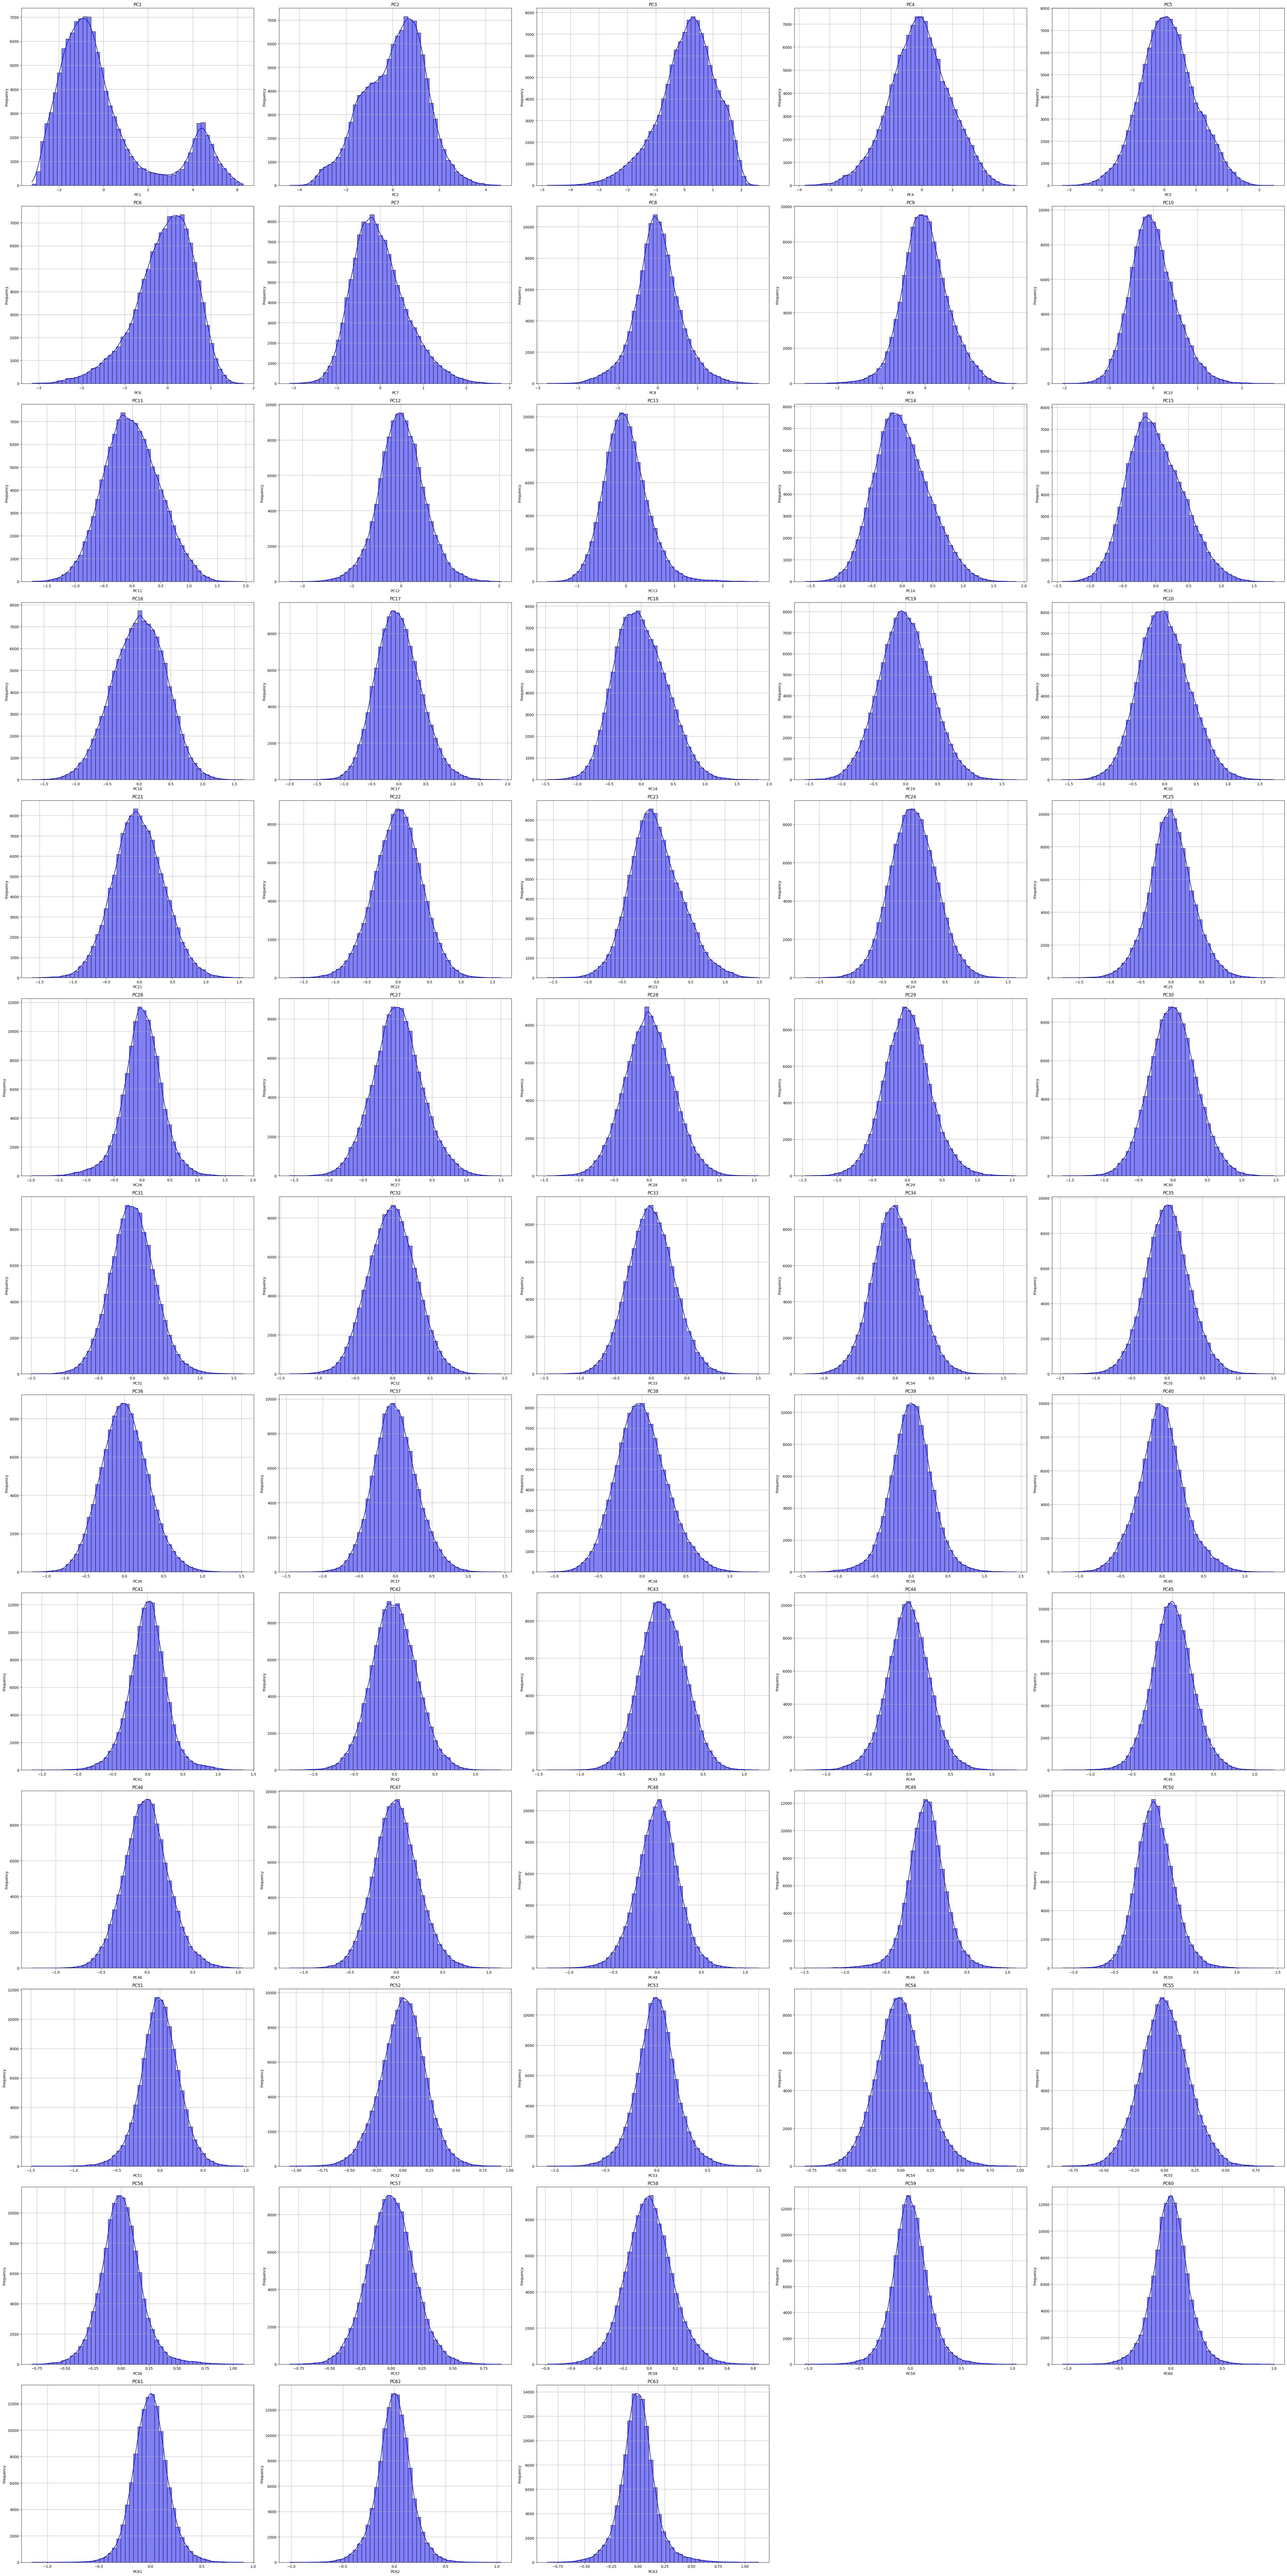

In [67]:
figure, ax = plt.subplots(ncols=5, nrows=13, figsize=(50, 100))
ax = ax.flatten()
hist_color = "blue"

for i, col in enumerate(X_train.columns):
    sns.histplot(X_train[col], kde=True, ax=ax[i], color=hist_color, bins=50)

    mean, std = X_train[col].mean(), X_train[col].std()

    ax[i].set_title(col)
    ax[i].set_xlabel(f'{col}')
    ax[i].set_ylabel('Frequency')
    ax[i].grid(True)
for j in range(len(X_train.columns), len(ax)):
    ax[j].set_visible(False)

plt.tight_layout()
plt.show()

# Plot Boxplots to see distribution of outliers.


When all boxplots are similar in appearance, with medians positioned approximately at the center and adhering to standard boxplot rules, it indicates a consistent distribution of values across the different variables. This uniformity suggests that the datasets share similar characteristics, such as scale and range, which can simplify analysis and model training. The presence of outliers is minimal, meaning that extreme values are not significantly influencing the overall distribution. Consequently, this scenario is favorable for model development, as it reduces the likelihood of skewed results and allows for more reliable predictions. The consistent boxplots further imply that the data may be well-suited for techniques that assume normality, making it easier to interpret the results of any applied statistical models.

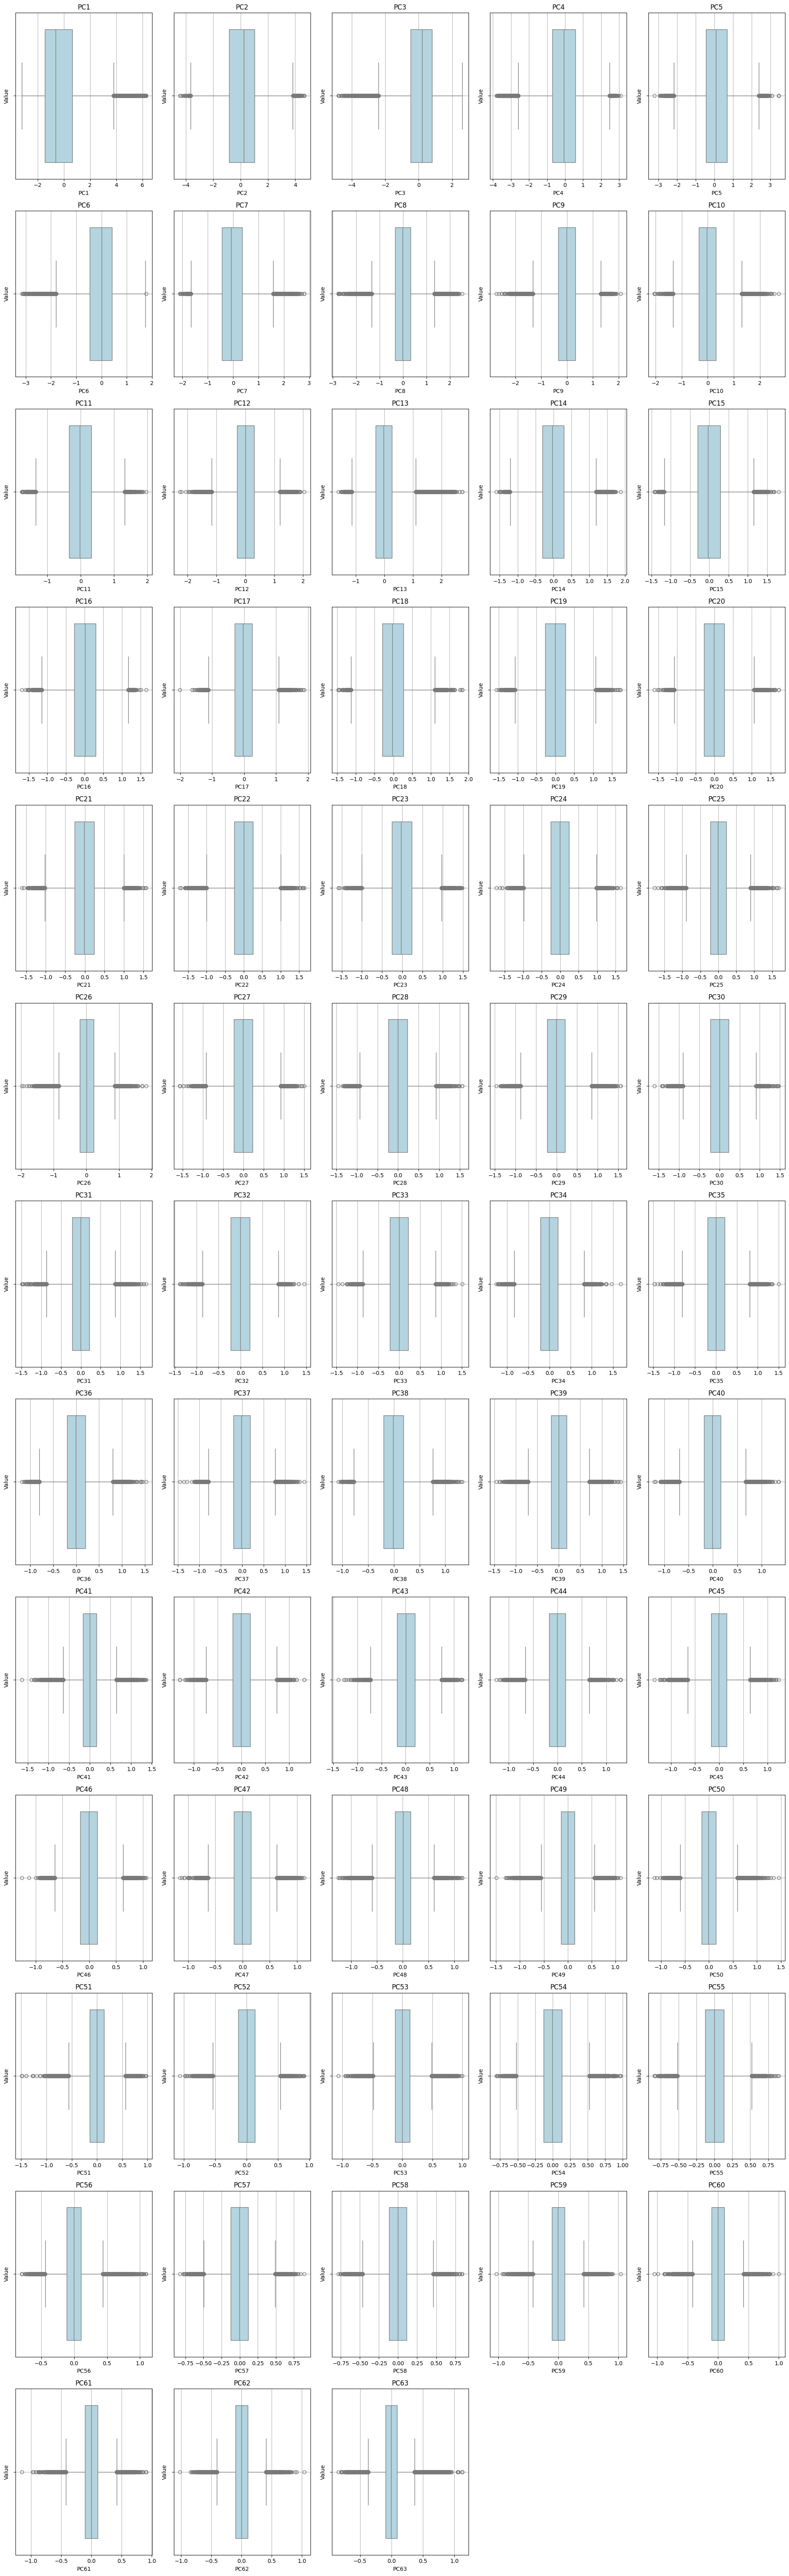

In [68]:
n_cols = 5
n_rows = (len(X_train.columns) + n_cols - 1) // n_cols

fig, ax = plt.subplots(ncols=n_cols, nrows=n_rows, figsize=(20, n_rows * 5))
ax = ax.flatten()
box_color = "lightblue"

for i, col in enumerate(X_train.columns):
    sns.boxplot(x=X_train[col], ax=ax[i], color=box_color)
    ax[i].set_title(col)
    ax[i].set_xlabel(f'{col}')
    ax[i].set_ylabel('Value')
    ax[i].grid(True)

for j in range(i + 1, len(ax)):
    ax[j].set_visible(False)

plt.tight_layout()
plt.show()


# Show target values and their distribution

On pie chart we see that target is perfectly balanced, which leads to improved model performance by ensuring that both classes are represented equally, which reduces bias and allows the model to generalize effectively.

The violin plot illustrates the distribution of profit values, revealing a significant concentration of data points near -13, which likely indicates the presence of churned customers. This peak suggests that a substantial number of these customers have incurred losses, as represented by the negative profit value. Additionally, the plot shows that profit values are distributed across a range from 0 to 20, indicating that while many customers may be generating positive profits, a notable portion still experiences significant losses. The wide distribution emphasizes the variability in customer profitability, with the -13 mark serving as a critical threshold that distinguishes between churned and non-churned customers. Overall, this visualization highlights the financial impact of customer churn on profitability within the dataset.


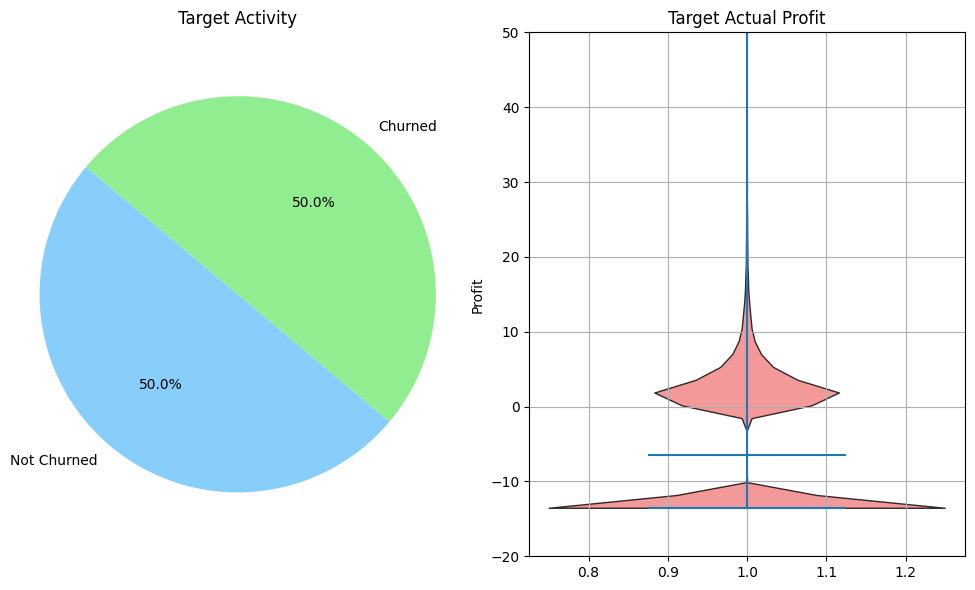

In [69]:
figure, ax = plt.subplots(ncols=2, nrows=1, figsize=(10, 6))
ax = ax.flatten()

# Pie chart
labels = ['Not Churned', 'Churned']
colors = ['lightskyblue', 'lightgreen']
sizes = y_train['target_event'].value_counts().values
ax[0].pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
ax[0].axis('equal')
ax[0].set_title('Target Activity')

parts = ax[1].violinplot(y_train['target_actual_profit'], showmeans=False, showmedians=True)

for pc in parts['bodies']:
    pc.set_facecolor('lightcoral')
    pc.set_edgecolor('black')
    pc.set_alpha(0.8)
ax[1].set_ylim(-20, 50)
ax[1].set_title('Target Actual Profit')
ax[1].set_ylabel('Profit')
ax[1].grid(True)

plt.tight_layout()
plt.show()

# Plot correlations to each target variable

The correlation analysis reveals that most features in the dataset exhibit similar correlation patterns with both the churn variable and the target actual profit. This suggests that the characteristics influencing customer churn are also likely to impact profitability in a comparable manner. Such parallel correlations may indicate that the factors leading to customer attrition, such as dissatisfaction or financial constraints, are also associated with lower profit margins. Consequently, addressing these common features could be vital for enhancing customer retention and overall profitability, highlighting the interrelated nature of customer behavior and financial outcomes in this context.

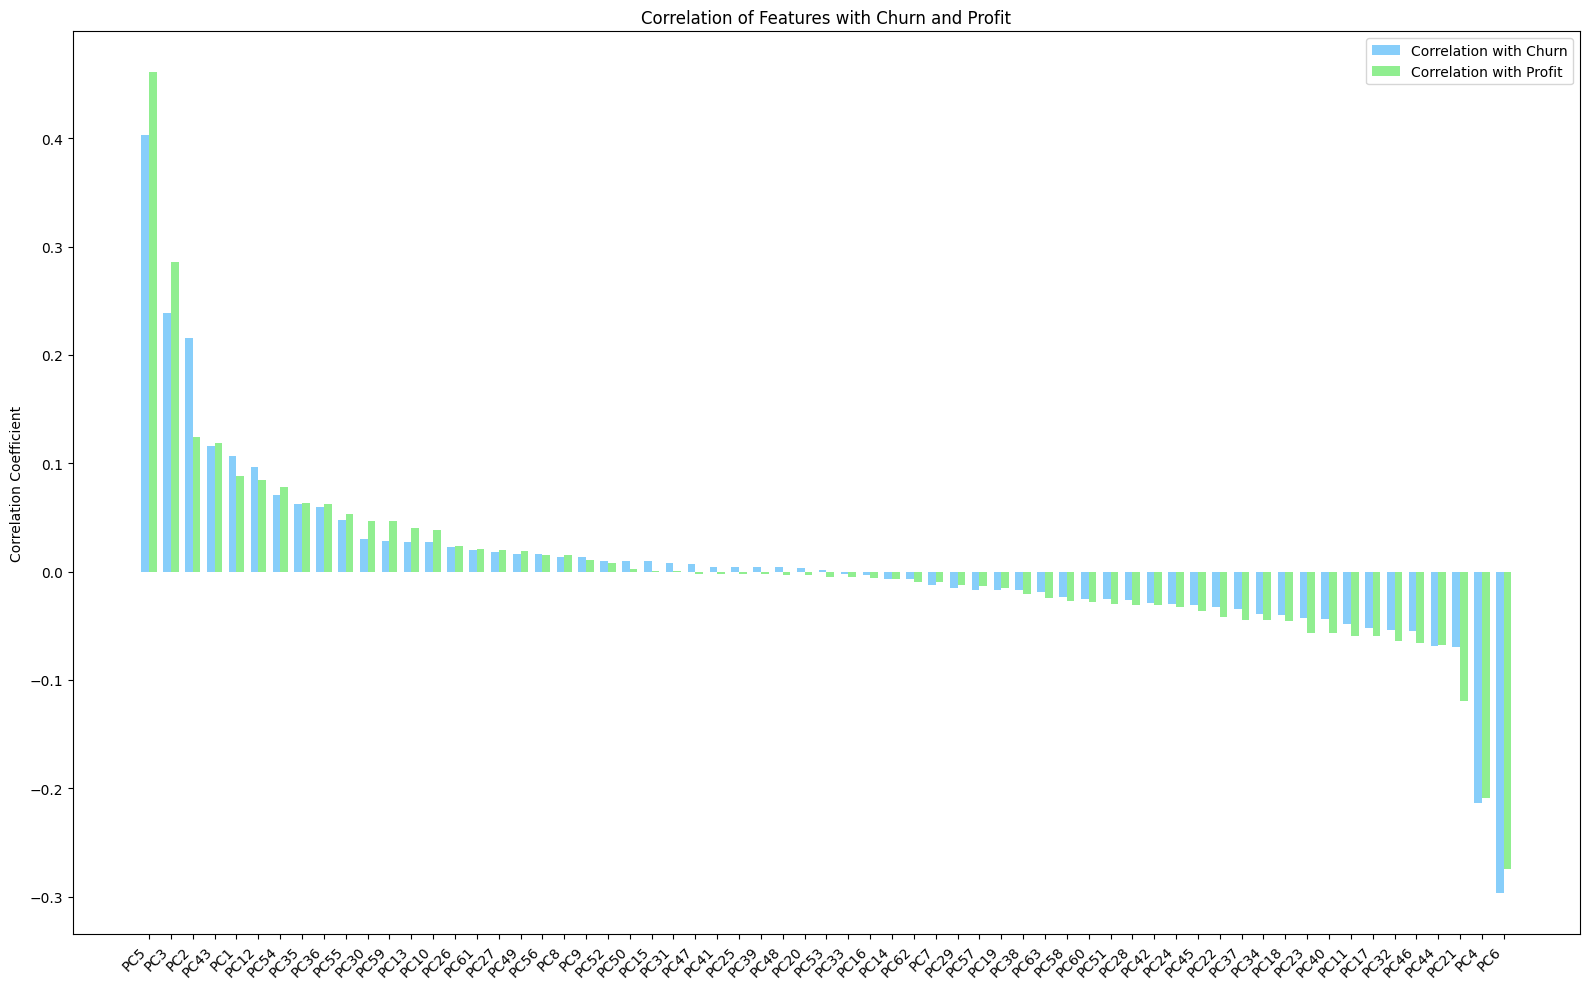

In [70]:
corr_with_churn = X_train.corrwith(y_train['target_event']).sort_values(ascending=False)
corr_with_profit = X_train.corrwith(y_train['target_actual_profit']).sort_values(ascending=False)

fig, ax = plt.subplots(figsize=(16, 10))

bar_width = 0.35

positions_churn = np.arange(len(corr_with_churn))
positions_profit = positions_churn + bar_width

ax.bar(positions_churn, corr_with_churn, width=bar_width, label='Correlation with Churn', color='lightskyblue')

ax.bar(positions_profit, corr_with_profit, width=bar_width, label='Correlation with Profit', color='lightgreen')

ax.set_xticks(positions_churn + bar_width / 2)
ax.set_xticklabels(corr_with_churn.index, rotation=45, ha='right')
ax.set_ylabel('Correlation Coefficient')
ax.set_title('Correlation of Features with Churn and Profit')
ax.legend()

plt.tight_layout()
plt.show()
